Sample rate: 44100 Hz
Shape: (2, 1310328)
Dtype: torch.float32


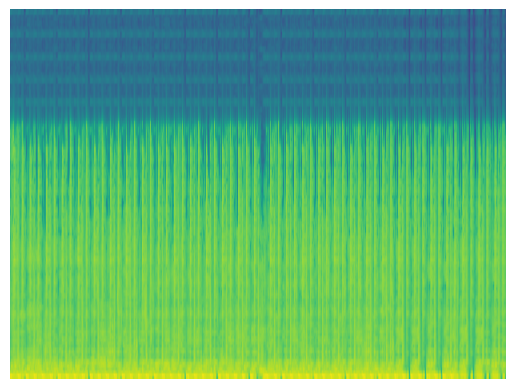

Sample rate: 44100 Hz
Shape: (2, 1310328)
Dtype: torch.float32


<Figure size 640x480 with 0 Axes>

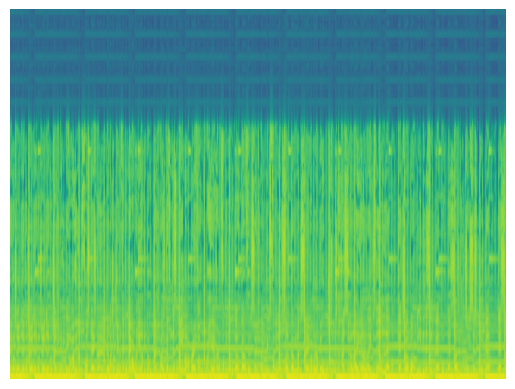

Sample rate: 44100 Hz
Shape: (2, 1310328)
Dtype: torch.float32


<Figure size 640x480 with 0 Axes>

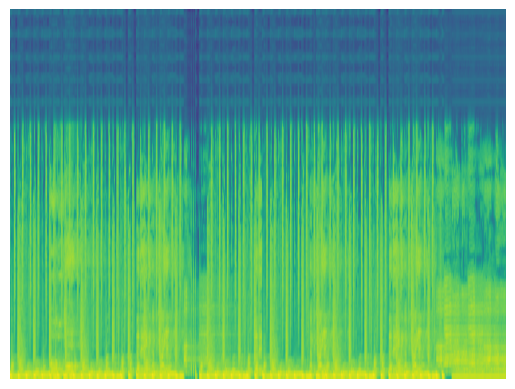

Sample rate: 44100 Hz
Shape: (2, 1310328)
Dtype: torch.float32


<Figure size 640x480 with 0 Axes>

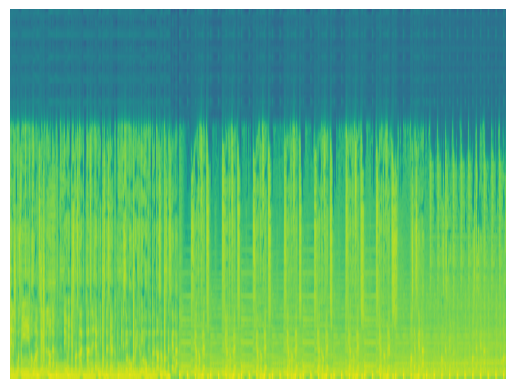

Sample rate: 44100 Hz
Shape: (2, 1310328)
Dtype: torch.float32


<Figure size 640x480 with 0 Axes>

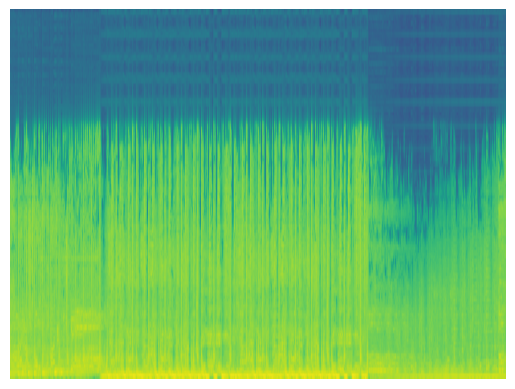

KeyboardInterrupt: ignored

<Figure size 640x480 with 0 Axes>

In [5]:
import os
import requests
import torch
import torchaudio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def print_stats(waveform, sample_rate=None, src=None):
    if src:
        print(f"{src}")
    if sample_rate:
        print(f"Sample rate: {sample_rate} Hz")
    print(f"Shape: {tuple(waveform.shape)}")
    print(f"Dtype: {waveform.dtype}")

# def plot_waveform(waveform, sample_rate, save_path=None):
#     plt.figure()
#     plt.plot(waveform.t().numpy())
#     if save_path:
#         plt.savefig(save_path)
#     else:
#         plt.show()

# def plot_specgram(waveform, sample_rate, save_path=None):
#     plt.figure()
#     specgram = torchaudio.transforms.Spectrogram()(waveform)
#     plt.imshow(specgram.log2()[0, :, :].numpy(), cmap='gray', aspect='auto')
#     plt.colorbar()
    # if save_path:
    #     plt.savefig(save_path)
    # else:
    #     plt.show()

def plot_waveform(waveform, sample_rate, title="Waveform", xlim=None, ylim=None, save_path=None):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    axes[c].plot(time_axis, waveform[c], linewidth=1)
    axes[c].grid(True)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
      axes[c].set_xlim(xlim)
    if ylim:
      axes[c].set_ylim(ylim)
  figure.suptitle(title)
  plt.show(block=False)
  if save_path:
    plt.savefig(save_path)
  else:
    plt.show()


# def plot_specgram(waveform, sample_rate, title="Spectrogram", xlim=None, save_path=None):
#   waveform = waveform.numpy()

#   num_channels, num_frames = waveform.shape
#   time_axis = torch.arange(0, num_frames) / sample_rate

#   figure, axes = plt.subplots(num_channels, 1)
#   if num_channels == 1:
#     axes = [axes]
#   for c in range(num_channels):
#     axes[c].specgram(waveform[c], Fs=sample_rate)
#     if num_channels > 1:
#       axes[c].set_ylabel(f'Channel {c+1}')
#     if xlim:
#       axes[c].set_xlim(xlim)
#   figure.suptitle(title)
#   plt.show(block=False)
#   if save_path:
#       plt.savefig(save_path)
#   else:
#       plt.show()

def plot_specgram(waveform, sample_rate, title="Spectrogram", xlim=None, save_path=None):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]

  for c in range(num_channels):
    axes[c].specgram(waveform[c], Fs=sample_rate)
    axes[c].set_axis_off() # Turn off axes

  #figure.suptitle(title)
  plt.show(block=False)
  if save_path:
      plt.savefig(save_path)
  else:
      plt.show()


def play_audio(waveform, sample_rate):
    pass  # Play the audio using your preferred method

# SAMPLE_WAV_SPEECH_PATH = "path/to/your/audio.wav"
# waveform, sample_rate = torchaudio.load(SAMPLE_WAV_SPEECH_PATH)

# print_stats(waveform, sample_rate=sample_rate)
# plot_waveform(waveform, sample_rate, save_path='waveform.png')
# plot_specgram(waveform, sample_rate, save_path='spectrogram.png')
# play_audio(waveform, sample_rate)

# Replace this with the name of your DataFrame
csv_file = "all_tracks-1.csv"
danceable_tracks = pd.read_csv(csv_file)

# Create a folder with the same name as the DataFrame
# folder_name = "all_tracks"
# if not os.path.exists(folder_name):
#     os.makedirs(folder_name)

folder_name_sg = "all_tracks-1_sg"
if not os.path.exists(folder_name_sg):
    os.makedirs(folder_name_sg)

# folder_name_wf = "all_tracks-1_wf"
# if not os.path.exists(folder_name_wf):
#     os.makedirs(folder_name_wf)

# Iterate through the DataFrame
for index, row in danceable_tracks.iterrows():
    track_id = row['track_id']
    preview_url = row['preview_url']

    # Download the preview audio
    response = requests.get(preview_url)

    # Save the audio file temporarily
    with open("temp_audio.mp3", "wb") as file:
        file.write(response.content)

    # Load the audio file using torchaudio
    waveform, sample_rate = torchaudio.load("temp_audio.mp3")
    waveform_mono = torch.mean(waveform, dim = 0, keepdim=True)
    # # Generate a spectrogram
    # specgram = torchaudio.transforms.Spectrogram()(waveform)

    # # Convert the spectrogram to dB scale
    # specgram_db = torchaudio.transforms.AmplitudeToDB()(specgram)

    # # Plot the spectrogram and save it as an image
    # plt.figure(figsize=(10, 4))
    # plt.imshow(specgram_db.log2()[0, :, :].numpy(), cmap='gray', aspect='auto', origin='lower')
    # plt.colorbar(format='%+2.0f dB')
    # plt.title(f'Spectrogram for track_id {track_id}')
    # plt.savefig(f"{folder_name}/{track_id}.png")
    # plt.close()

    #filename_wf = (f"{folder_name_wf}/{track_id}.png")
    filename_sg = (f"{folder_name_sg}/{track_id}.png")

    print_stats(waveform, sample_rate=sample_rate)
    #plot_waveform(waveform, sample_rate, save_path=filename_wf)
    plot_specgram(waveform_mono, sample_rate, save_path=filename_sg)
    play_audio(waveform, sample_rate)

# Delete the temporary audio file
os.remove("temp_audio.mp3")


In [ ]:
!conda install -c conda-forge librosa --yes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install pandas

  Using cached pandas-1.5.3-cp310-cp310-macosx_10_9_x86_64.whl (12.0 MB)
  Using cached pytz-2022.7.1-py2.py3-none-any.whl (499 kB)
